<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 170.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 150.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 140.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 137.7 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-02-03 07:16:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.6MB/s    in 2.4s    

2025-02-03 07:16:39 (64.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_168/2643472193.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)


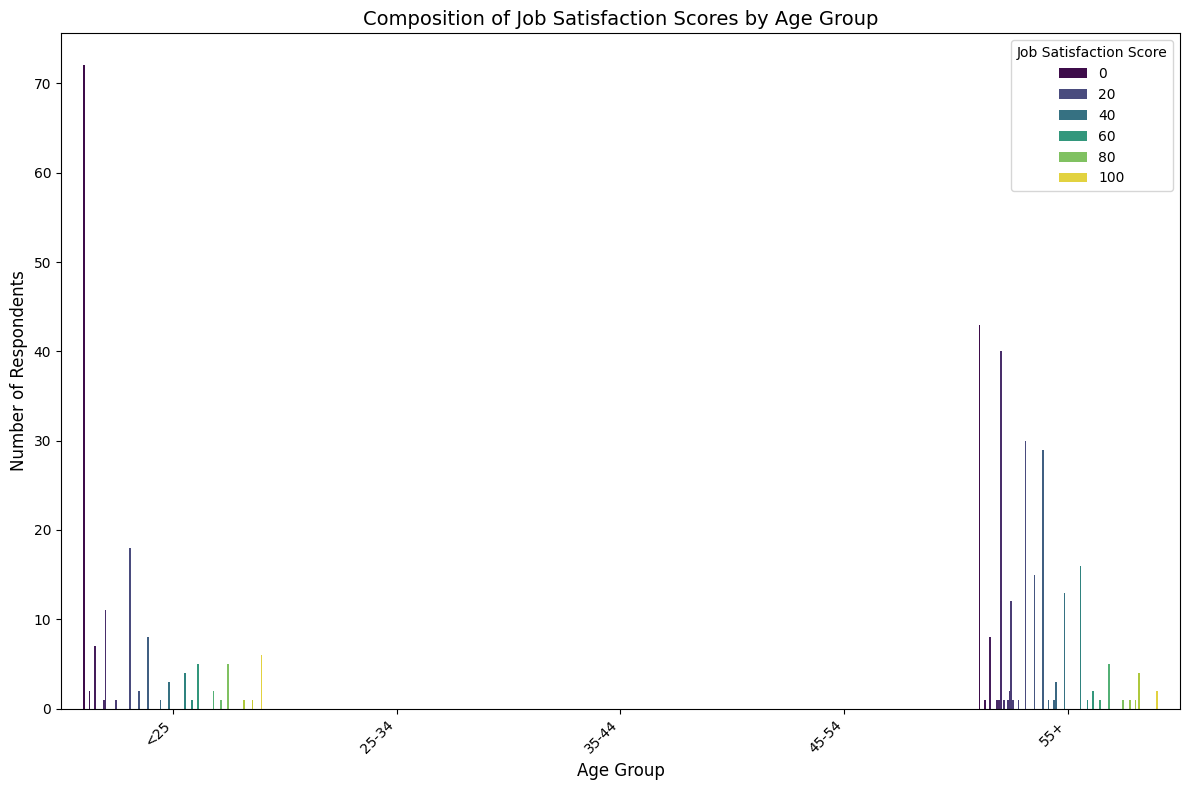

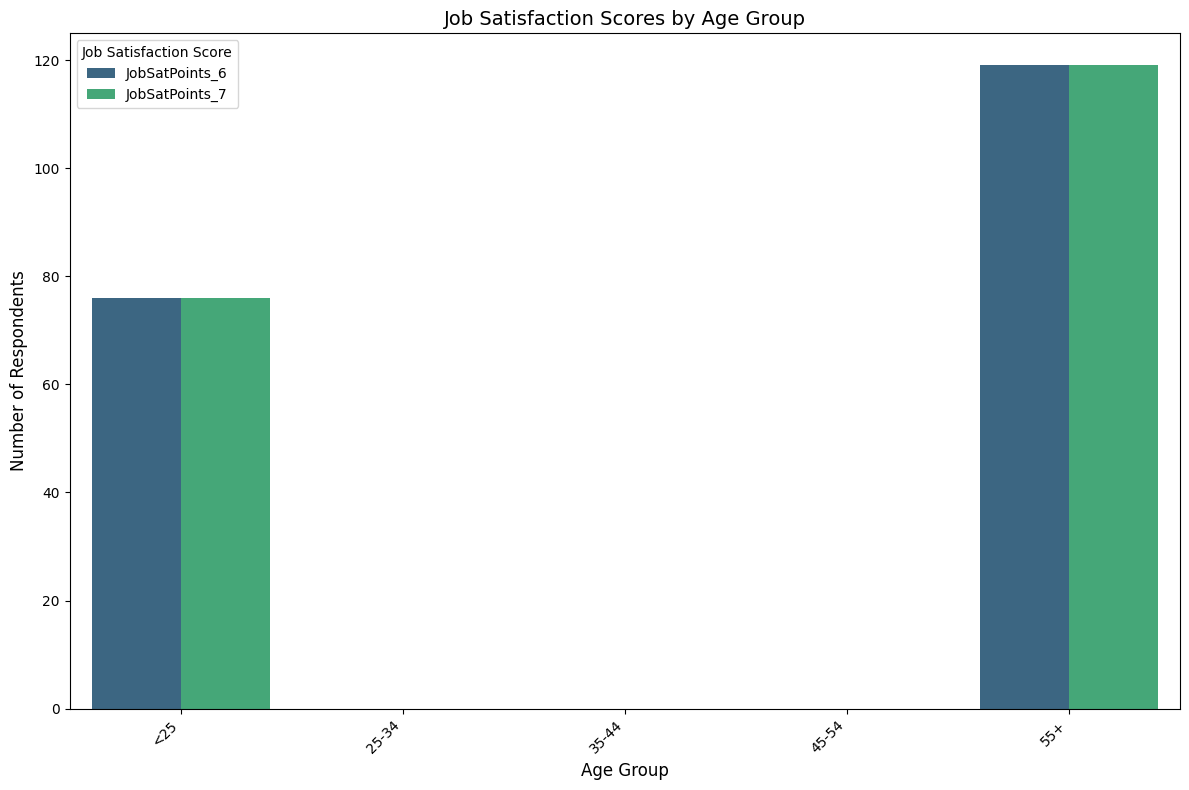

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual loading code)
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Replace with your URL
try:
    df = pd.read_csv(dataset_url)
except FileNotFoundError:
    print(f"Error: File not found at {dataset_url}")
    exit()
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    exit()

# --- Data Cleaning and Preparation ---

# 1. Handle Missing or Non-Numeric Values in 'Age'
df['Age'] = df['Age'].replace(r'\D+', '', regex=True)  # Remove non-numeric characters
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, errors='coerce' sets non-numeric to NaN

# 2. Handle Missing Values in 'JobSatPoints_6' and 'JobSatPoints_7'
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')  # Convert to numeric
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')  # Convert to numeric

# Choose ONE of the following strategies (or another appropriate for your data):

# a) Drop rows with NaN in ANY of the relevant columns (simplest if few NaN)
df_cleaned = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# b) Impute with median (if appropriate and you want to keep the rows):
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['JobSatPoints_6'].fillna(df['JobSatPoints_6'].median(), inplace=True)
# df['JobSatPoints_7'].fillna(df['JobSatPoints_7'].median(), inplace=True)

# 3. Create Age Groups (Optional but recommended)
bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55+']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# --- Visualization ---

# 1. Stacked Bar Chart (Recommended for composition)
plt.figure(figsize=(12, 8))

df_melted = pd.melt(df_cleaned, id_vars=['AgeGroup'], value_vars=['JobSatPoints_6', 'JobSatPoints_7'], var_name='JobSatPoint', value_name='Score')

sns.countplot(x='AgeGroup', hue='Score', data=df_melted, palette='viridis')

plt.title('Composition of Job Satisfaction Scores by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Grouped Bar Chart (Alternative view)
plt.figure(figsize=(12, 8))

sns.countplot(x='AgeGroup', hue='JobSatPoint', data=df_melted, palette='viridis')

plt.title('Job Satisfaction Scores by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Heatmap (If you have many age groups and satisfaction levels)
# (This is good for a high-level overview but less precise for comparing values)
# satisfaction_counts = df_melted.groupby(['AgeGroup', 'Score']).size().unstack(fill_value=0)
# plt.figure(figsize=(10, 8))
# sns.heatmap(satisfaction_counts, annot=True, fmt='d', cmap='YlGnBu')
# plt.title('Job Satisfaction Scores by Age Group (Heatmap)', fontsize=14)
# plt.xlabel('Job Satisfaction Score', fontsize=12)
# plt.ylabel('Age Group', fontsize=12)
# plt.tight_layout()
# plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


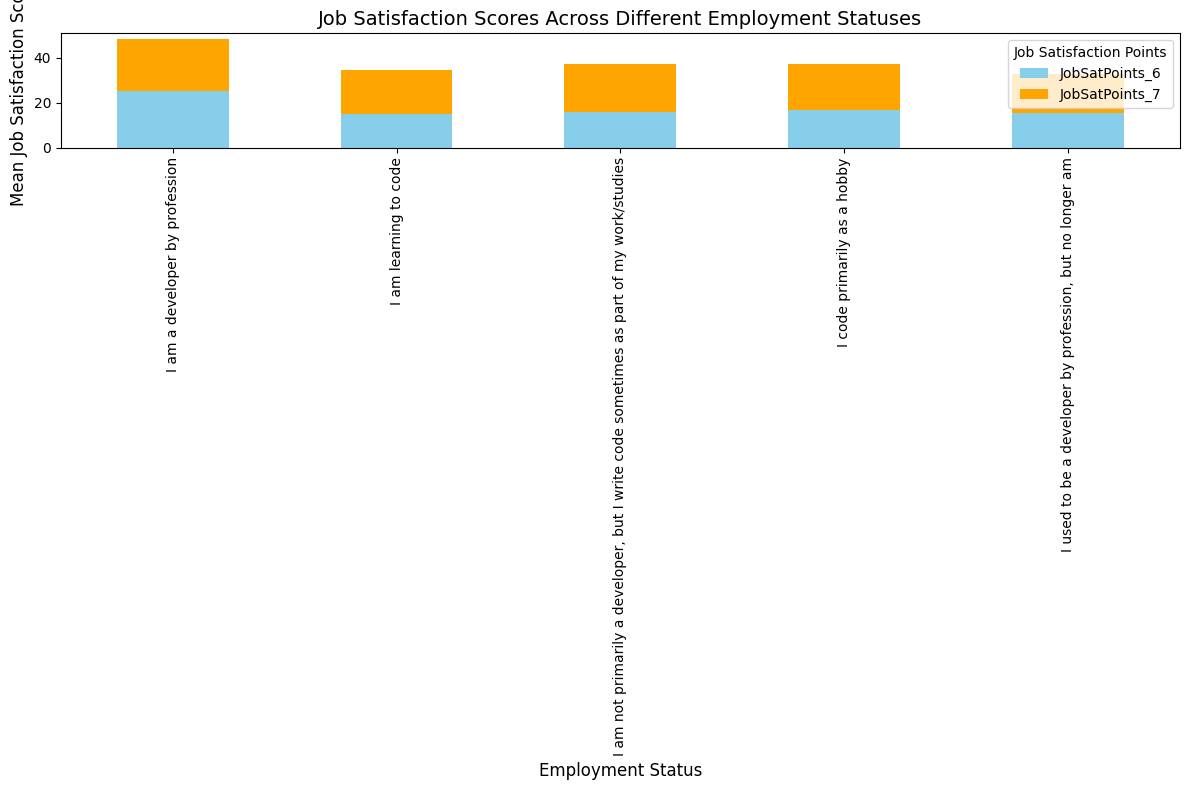

In [19]:
# Display the column names
print(df.columns)

# Convert the relevant columns to numeric values
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Filter out rows with missing values in the relevant columns
df_filtered = df.dropna(subset=['MainBranch', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by employment status and calculate the mean job satisfaction scores
employment_groups = df_filtered.groupby('MainBranch')[['JobSatPoints_6', 'JobSatPoints_7']].mean()

# Plot the stacked bar chart
ax = employment_groups.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Job Satisfaction Scores Across Different Employment Statuses', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Mean Job Satisfaction Score', fontsize=12)
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()  # Adjust layout for better display
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Age' and 'Metric' and compute the mean for the 'Value' column.
# (Ensure that 'Value' corresponds to the column holding the numeric values.)
df_grouped = df_melted.groupby(['Age', 'Metric'])['Value'].mean().unstack()

# Convert all data to numeric (if not already) and drop rows that are entirely NaN
df_grouped = df_grouped.apply(pd.to_numeric, errors='coerce')
df_grouped = df_grouped.dropna(how='all')

# Check if there is any numeric data to plot
if df_grouped.empty or df_grouped.select_dtypes(include='number').empty:
    print("No numeric data available for plotting. Please verify the data in df_melted.")
else:
    # Plot the stacked bar chart
    ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Composition of Compensation and Job Satisfaction (Ages 30-35)', fontsize=14)
    plt.xlabel('Age (30-35)', fontsize=12)
    plt.ylabel('Mean Value', fontsize=12)
    plt.tight_layout()  # Adjusts layout to prevent clipping of labels
    plt.show()

No numeric data available for plotting. Please verify the data in df_melted.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_168/2152810793.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df.groupby('AgeGroup')['ConvertedCompYearly'].median()
/tmp/ipykernel_168/2152810793.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df.groupby('AgeGroup')['JobSatPoints_6'].median()


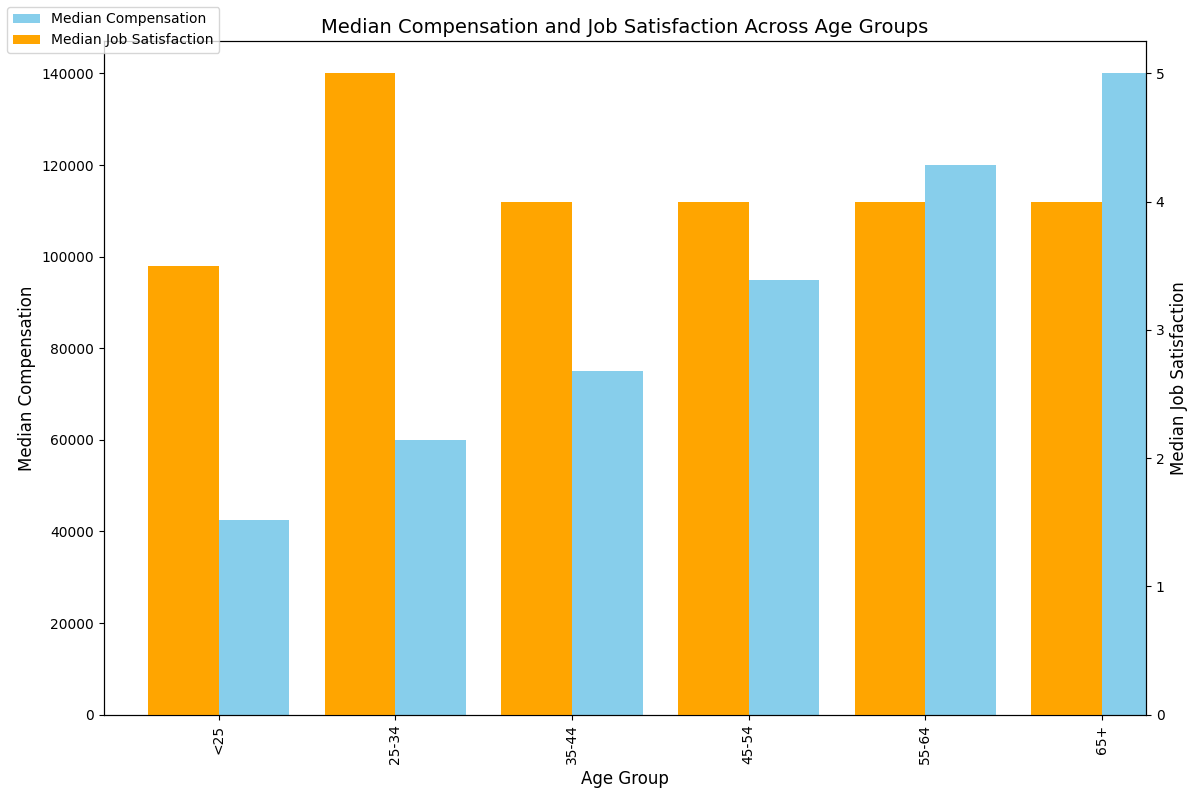

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data loading)
data = {'Age': [20, 22, 28, 30, 33, 38, 40, 42, 48, 50, 52, 58, 60, 62, 68],
        'ConvertedCompYearly': [40000, 45000, 55000, 60000, 65000, 70000, 75000, 80000, 90000, 95000, 100000, 110000, 120000, 130000, 140000],
        'JobSatPoints_6': [3, 4, 5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 3, 5, 4]}
df = pd.DataFrame(data)


# Convert the relevant columns to numeric values (handle errors)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Create age groups (handle potential NaNs after conversion)
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

#Drop rows with NaN values after converting to numeric
df = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Calculate the median compensation and job satisfaction for each age group
median_compensation = df.groupby('AgeGroup')['ConvertedCompYearly'].median()
median_job_satisfaction = df.groupby('AgeGroup')['JobSatPoints_6'].median()

# Create a DataFrame for the median values
median_data = pd.DataFrame({
    'Median Compensation': median_compensation,
    'Median Job Satisfaction': median_job_satisfaction
})

# Plot the median compensation and job satisfaction for each age group
fig, ax1 = plt.subplots(figsize=(12, 8))

median_data['Median Compensation'].plot(kind='bar', ax=ax1, position=0, width=0.4, color='skyblue', label='Median Compensation')
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
median_data['Median Job Satisfaction'].plot(kind='bar', ax=ax2, position=1, width=0.4, color='orange', label='Median Job Satisfaction')

ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Median Compensation', fontsize=12)
ax2.set_ylabel('Median Job Satisfaction', fontsize=12)
ax1.set_title('Median Compensation and Job Satisfaction Across Age Groups', fontsize=14)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc="upper left") # Adjusted Legend Location

plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_168/519485640.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_sat_counts = df_filtered.groupby(['AgeGroup', 'JobSatPoints_6']).size().unstack(fill_value=0)


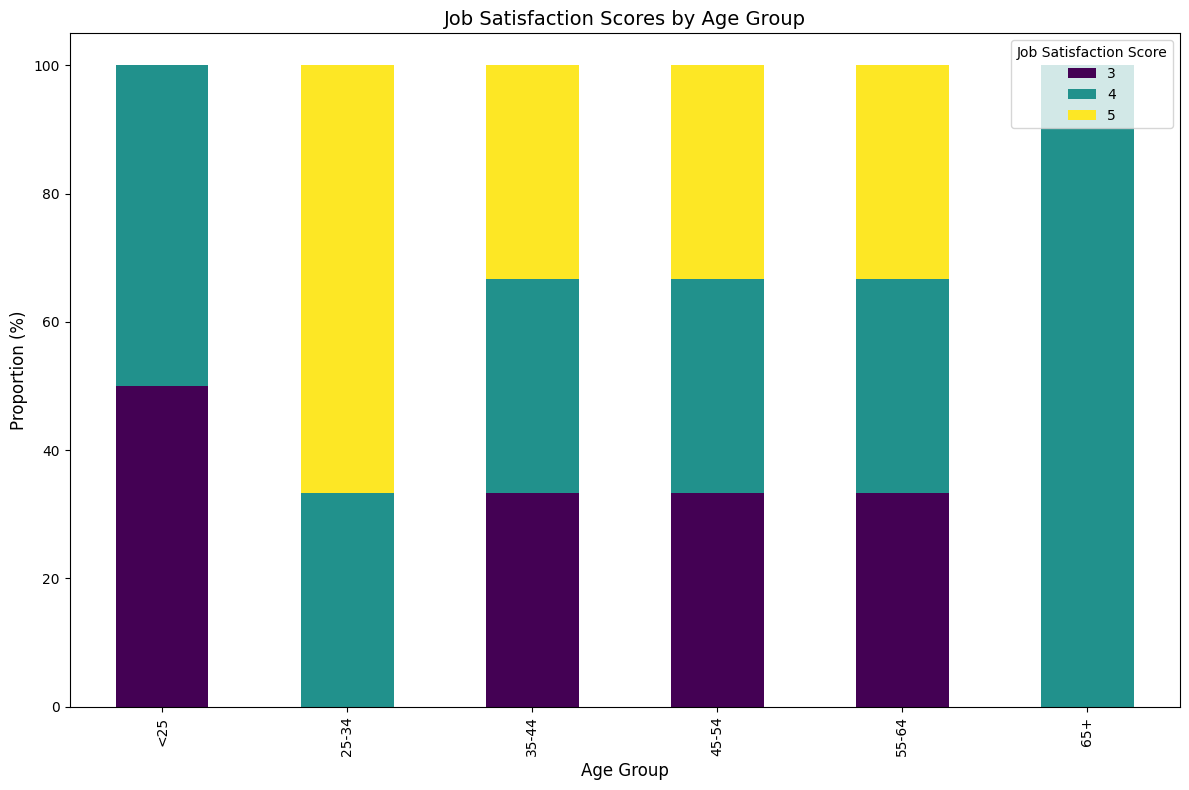

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Age column to numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter out rows with missing values in the relevant columns
df_filtered = df.dropna(subset=['AgeGroup', 'JobSatPoints_6'])

# Group by age group and job satisfaction score, then count the occurrences
job_sat_counts = df_filtered.groupby(['AgeGroup', 'JobSatPoints_6']).size().unstack(fill_value=0)

# Calculate the proportion of each job satisfaction score in each age group
job_sat_proportions = job_sat_counts.apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the stacked bar chart
job_sat_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Job Satisfaction Scores by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.legend(title='Job Satisfaction Score')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


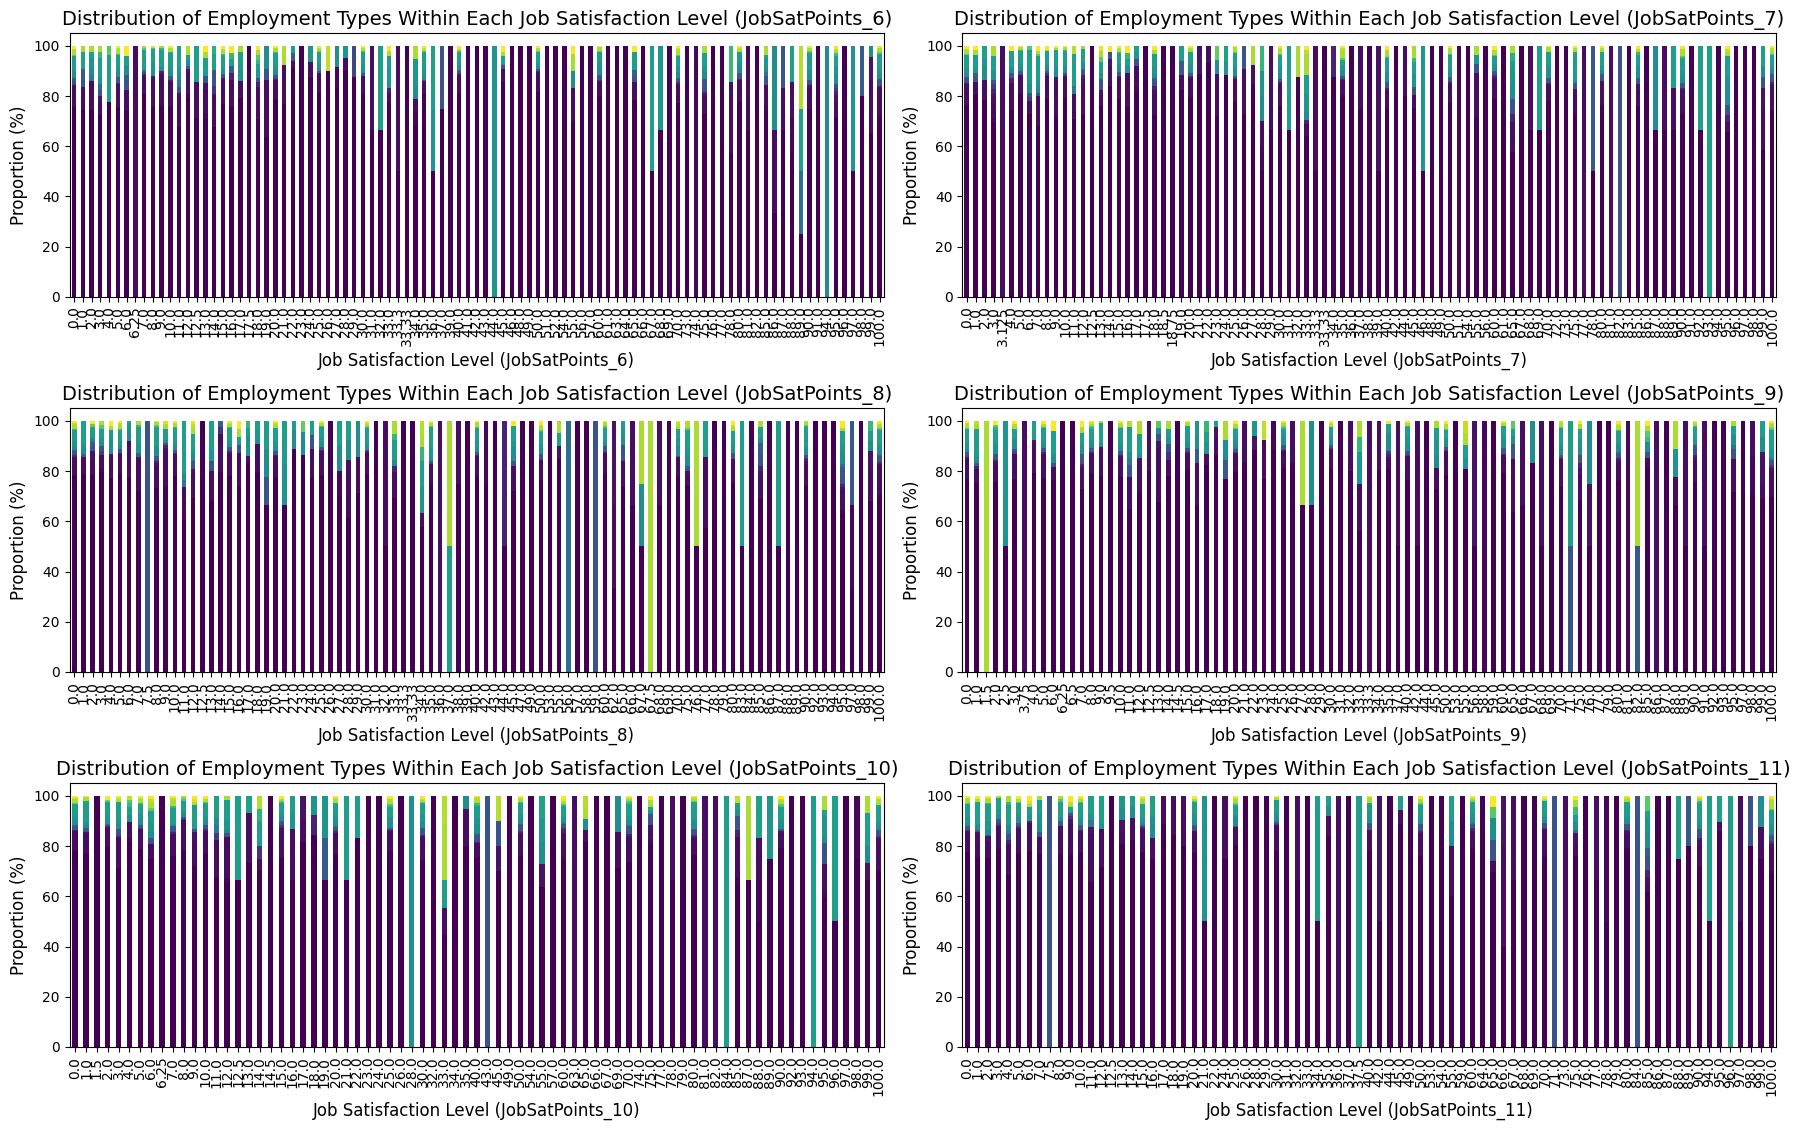

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a local file
file_name = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Ensure this path is correct
df = pd.read_csv(file_name)

# Convert the relevant columns to numeric values
job_sat_columns = ['JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']
for col in job_sat_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter out rows with missing values in the relevant columns
df_filtered = df.dropna(subset=job_sat_columns + ['Employment'])

# Create a 3x2 grid of charts
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# Plot stacked bar charts for each job satisfaction point
for i, col in enumerate(job_sat_columns):
    # Group by job satisfaction level and employment type, then count the occurrences
    employment_counts = df_filtered.groupby([col, 'Employment']).size().unstack(fill_value=0)

    # Calculate the proportion of each employment type in each job satisfaction level
    employment_proportions = employment_counts.apply(lambda x: x / x.sum(), axis=1) * 100

    # Plot the stacked bar chart
    employment_proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'Distribution of Employment Types Within Each Job Satisfaction Level ({col})', fontsize=14)
    axes[i].set_xlabel(f'Job Satisfaction Level ({col})', fontsize=12)
    axes[i].set_ylabel('Proportion (%)', fontsize=12)
    axes[i].legend().remove()  # Remove the legend

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_168/2543193934.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageAdmired'].fillna('', inplace=True)  # Fill NaN with empty string
/tmp/ipykernel_168/2543193934.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  language_counts = df_filtered.groupby(['AgeGroup', 'LanguageAdmired'])['LanguageAdmired'].count()

<Figure size 1400x800 with 0 Axes>

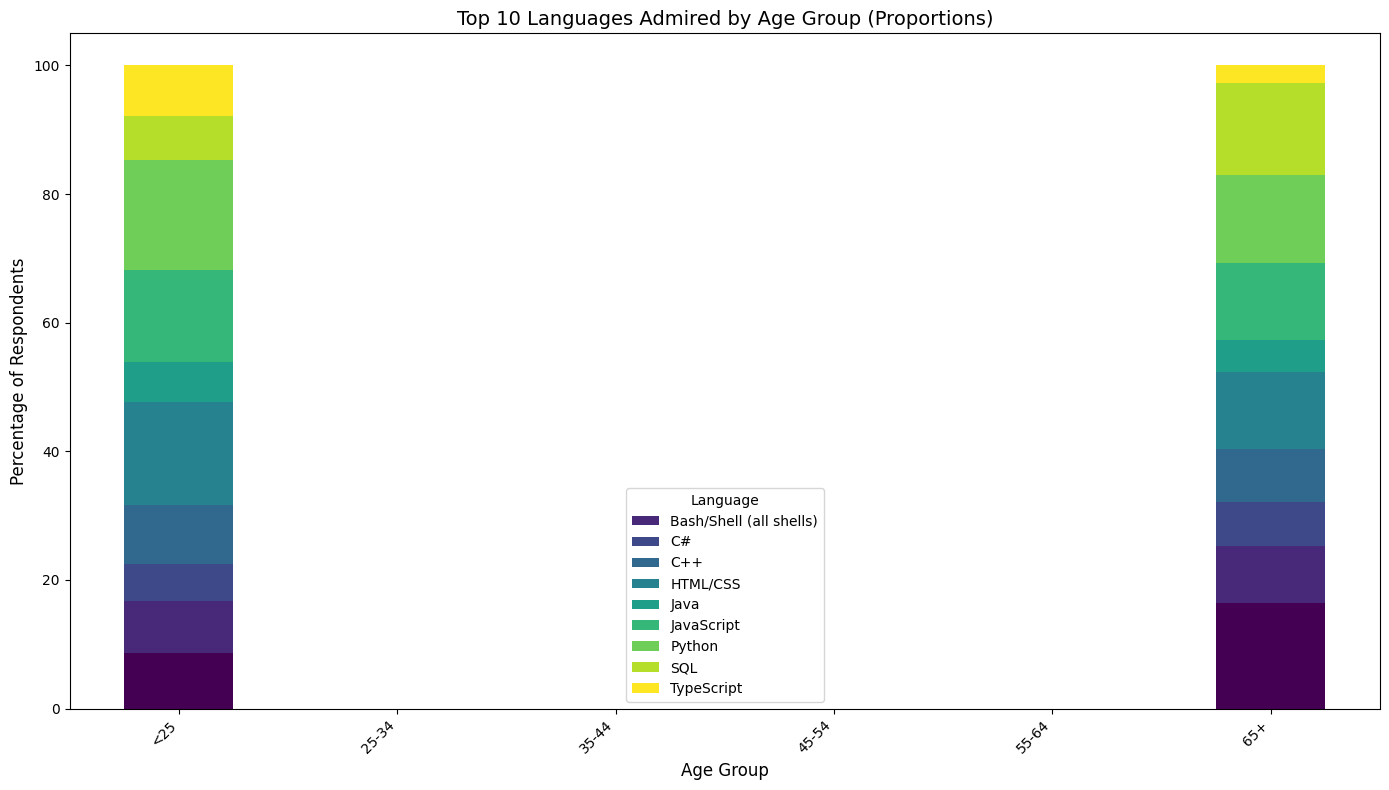

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual loading code)
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
try:
    df = pd.read_csv(dataset_url)
except FileNotFoundError:
    print(f"Error: File not found at {dataset_url}")
    exit()
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    exit()

# --- Data Cleaning and Preparation ---

# 1. Handle Missing or Non-Numeric Values in 'Age'
df['Age'] = df['Age'].replace(r'\D+', '', regex=True)  # Remove non-numeric characters
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, errors='coerce' sets non-numeric to NaN

# 2. Handle Missing Values in 'LanguageAdmired'
df['LanguageAdmired'].fillna('', inplace=True)  # Fill NaN with empty string

# 3. Create Age Groups (Optional but recommended)
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 4. Explode the 'LanguageAdmired' column
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LanguageAdmired')
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip() # Clean up whitespace

# --- Visualization (Stacked Bar Chart) ---

plt.figure(figsize=(14, 8))  # Adjust figure size as needed

# Get the top languages overall (you can adjust the number)
top_n = 10  # Number of top languages to visualize
top_languages = df_exploded['LanguageAdmired'].value_counts().nlargest(top_n).index

# Filter for top languages
df_filtered = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# Group, count, and calculate percentages
language_counts = df_filtered.groupby(['AgeGroup', 'LanguageAdmired'])['LanguageAdmired'].count().unstack(fill_value=0)
language_percentages = language_counts.apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the stacked bar chart
language_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title(f'Top {top_n} Languages Admired by Age Group (Proportions)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.legend(title='Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Alternative Visualization (Heatmap) ---
# If you have many languages and age groups, a heatmap might be useful.

# plt.figure(figsize=(14, 10))
# sns.heatmap(language_percentages, annot=True, fmt=".1f", cmap="YlGnBu")  # Annotate with percentages
# plt.title(f'Top {top_n} Languages Admired by Age Group (Heatmap)', fontsize=14)
# plt.xlabel('Language', fontsize=12)
# plt.ylabel('Age Group', fontsize=12)
# plt.tight_layout()
# plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_168/1077995396.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PlatformAdmired'].fillna('', inplace=True)  # Fill NaN with empty string
/tmp/ipykernel_168/1077995396.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

<Figure size 1400x800 with 0 Axes>

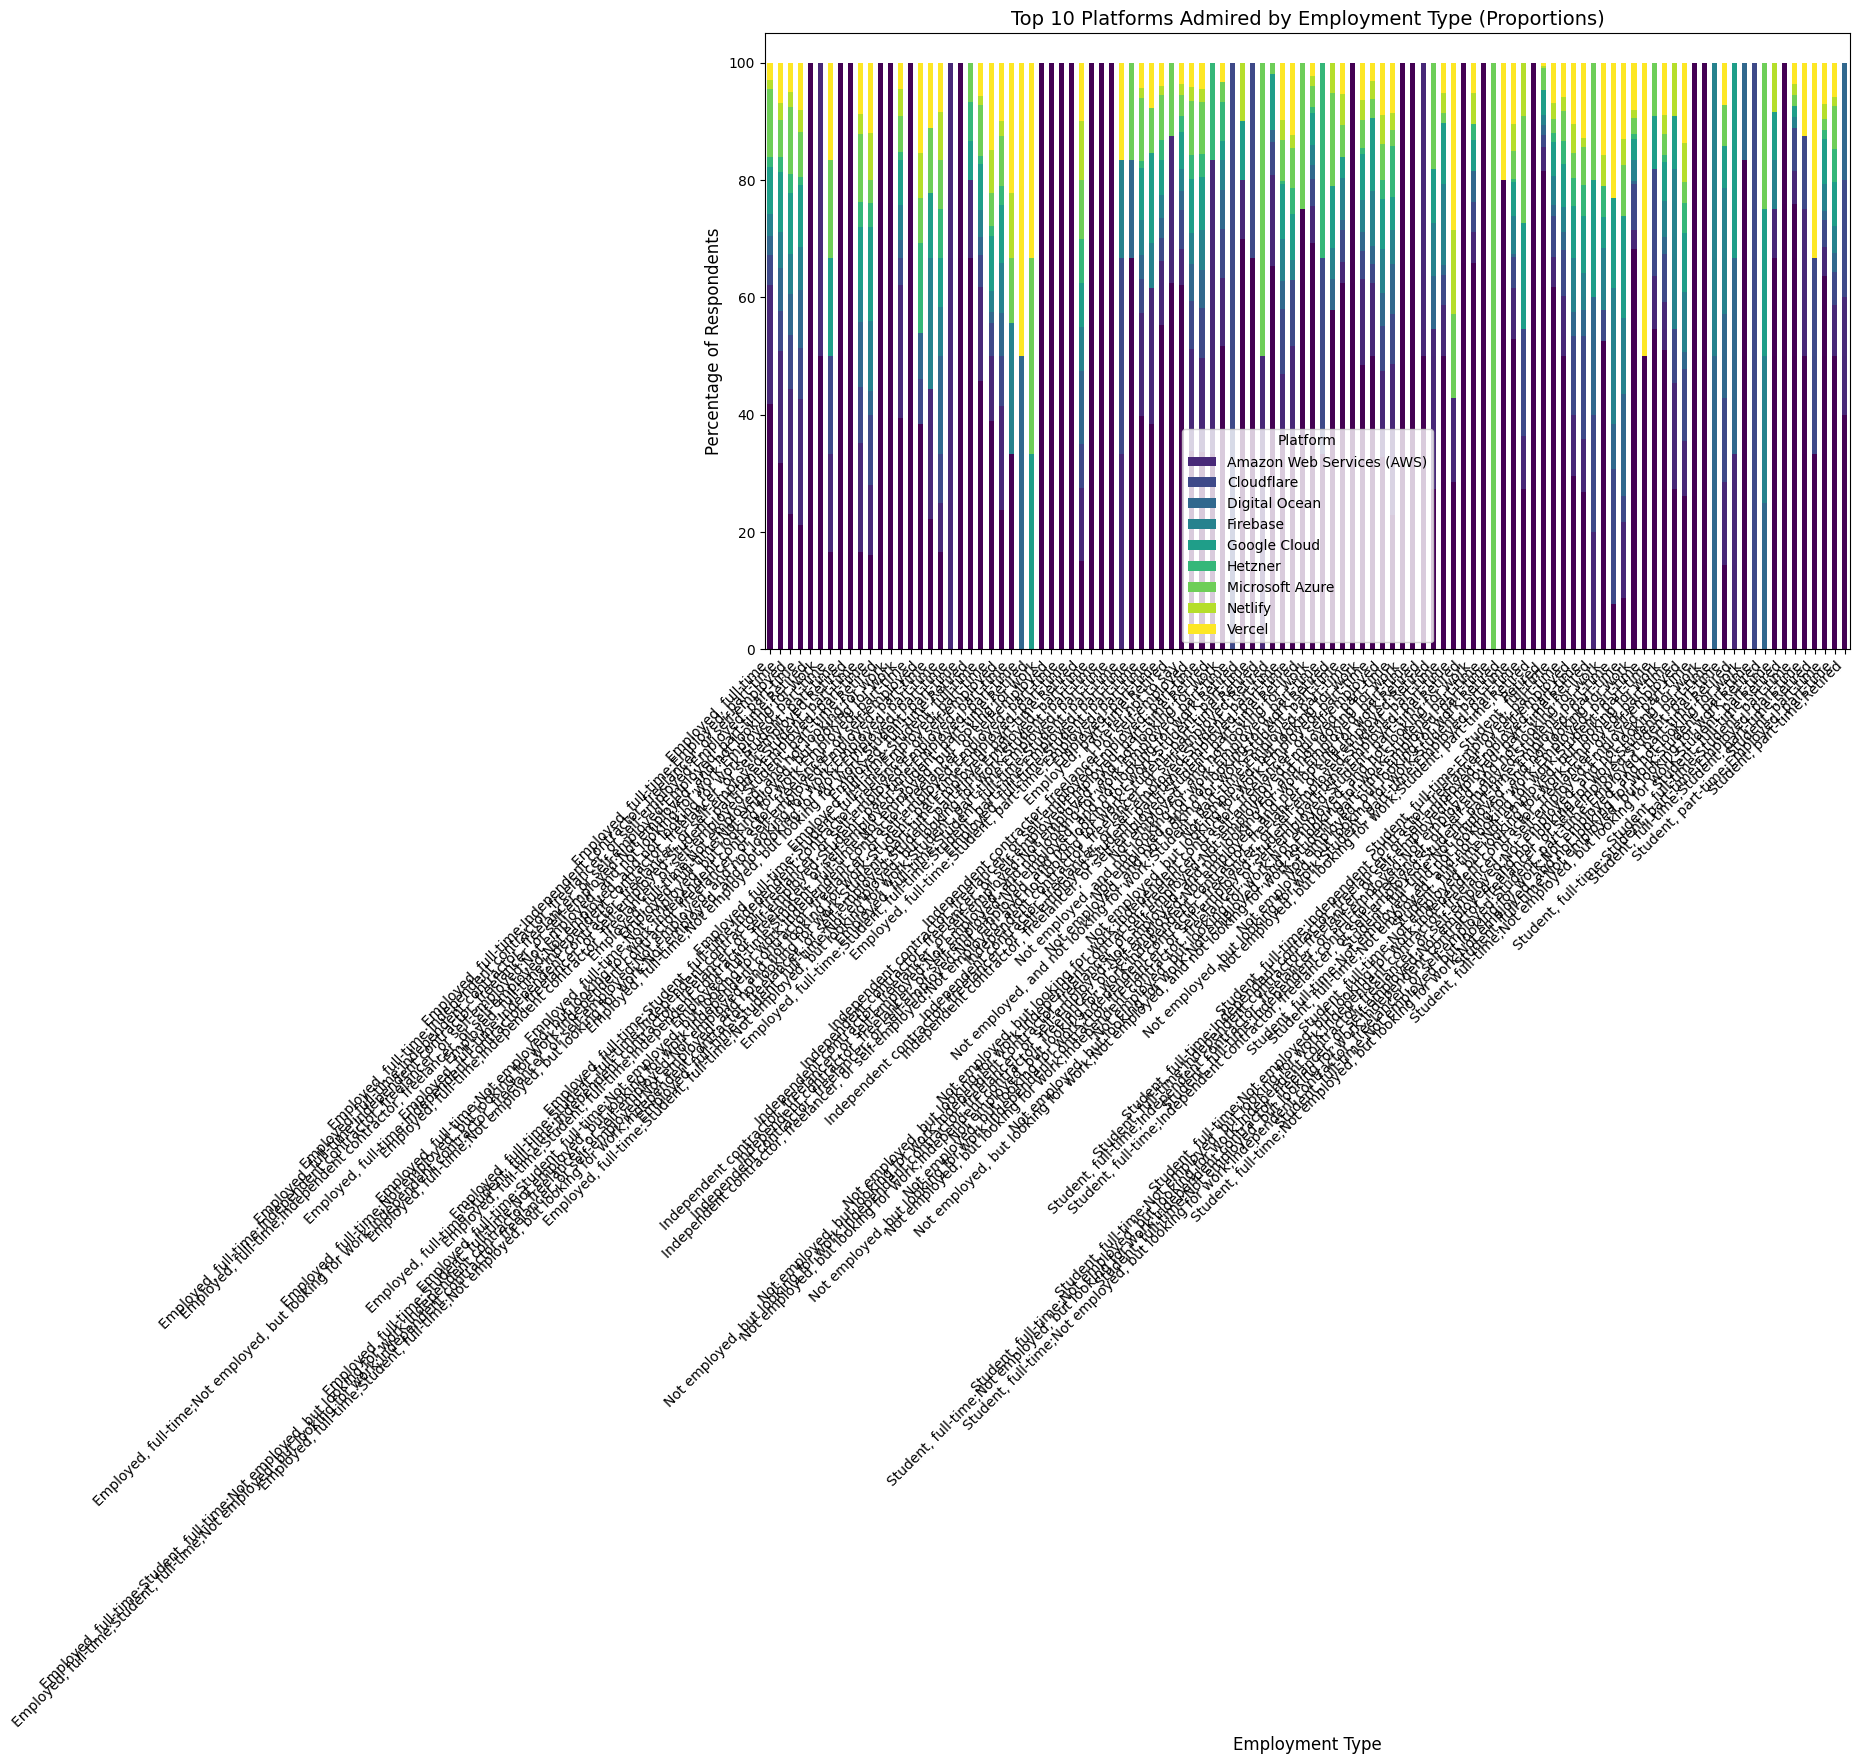

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual loading code)
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
try:
    df = pd.read_csv(dataset_url)
except FileNotFoundError:
    print(f"Error: File not found at {dataset_url}")
    exit()
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    exit()


# --- Data Cleaning and Preparation ---

# 1. Handle Missing Values in 'PlatformAdmired' and 'Employment'
df['PlatformAdmired'].fillna('', inplace=True)  # Fill NaN with empty string
df['Employment'].fillna('Unknown', inplace=True)  # Or dropna, or use a more appropriate strategy

# 2. Explode the 'PlatformAdmired' column
df['PlatformAdmired'] = df['PlatformAdmired'].str.split(';')
df_exploded = df.explode('PlatformAdmired')
df_exploded['PlatformAdmired'] = df_exploded['PlatformAdmired'].str.strip()  # Clean up whitespace


# --- Visualization (Stacked Bar Chart) ---

plt.figure(figsize=(14, 8))  # Adjust figure size as needed

# Get the top platforms overall (you can adjust the number)
top_n = 10  # Number of top platforms to visualize
top_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(top_n).index

# Filter for top platforms
df_filtered = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Group, count, and calculate percentages
platform_counts = df_filtered.groupby(['Employment', 'PlatformAdmired'])['PlatformAdmired'].count().unstack(fill_value=0)
platform_percentages = platform_counts.apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the stacked bar chart
platform_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title(f'Top {top_n} Platforms Admired by Employment Type (Proportions)', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Alternative Visualization (Heatmap) ---
# If you have many platforms and employment types, a heatmap might be useful.

# plt.figure(figsize=(14, 10))
# sns.heatmap(platform_percentages, annot=True, fmt=".1f", cmap="YlGnBu")  # Annotate with percentages
# plt.title(f'Top {top_n} Platforms Admired by Employment Type (Heatmap)', fontsize=14)
# plt.xlabel('Platform', fontsize=12)
# plt.ylabel('Employment Type', fontsize=12)
# plt.tight_layout()
# plt.show()

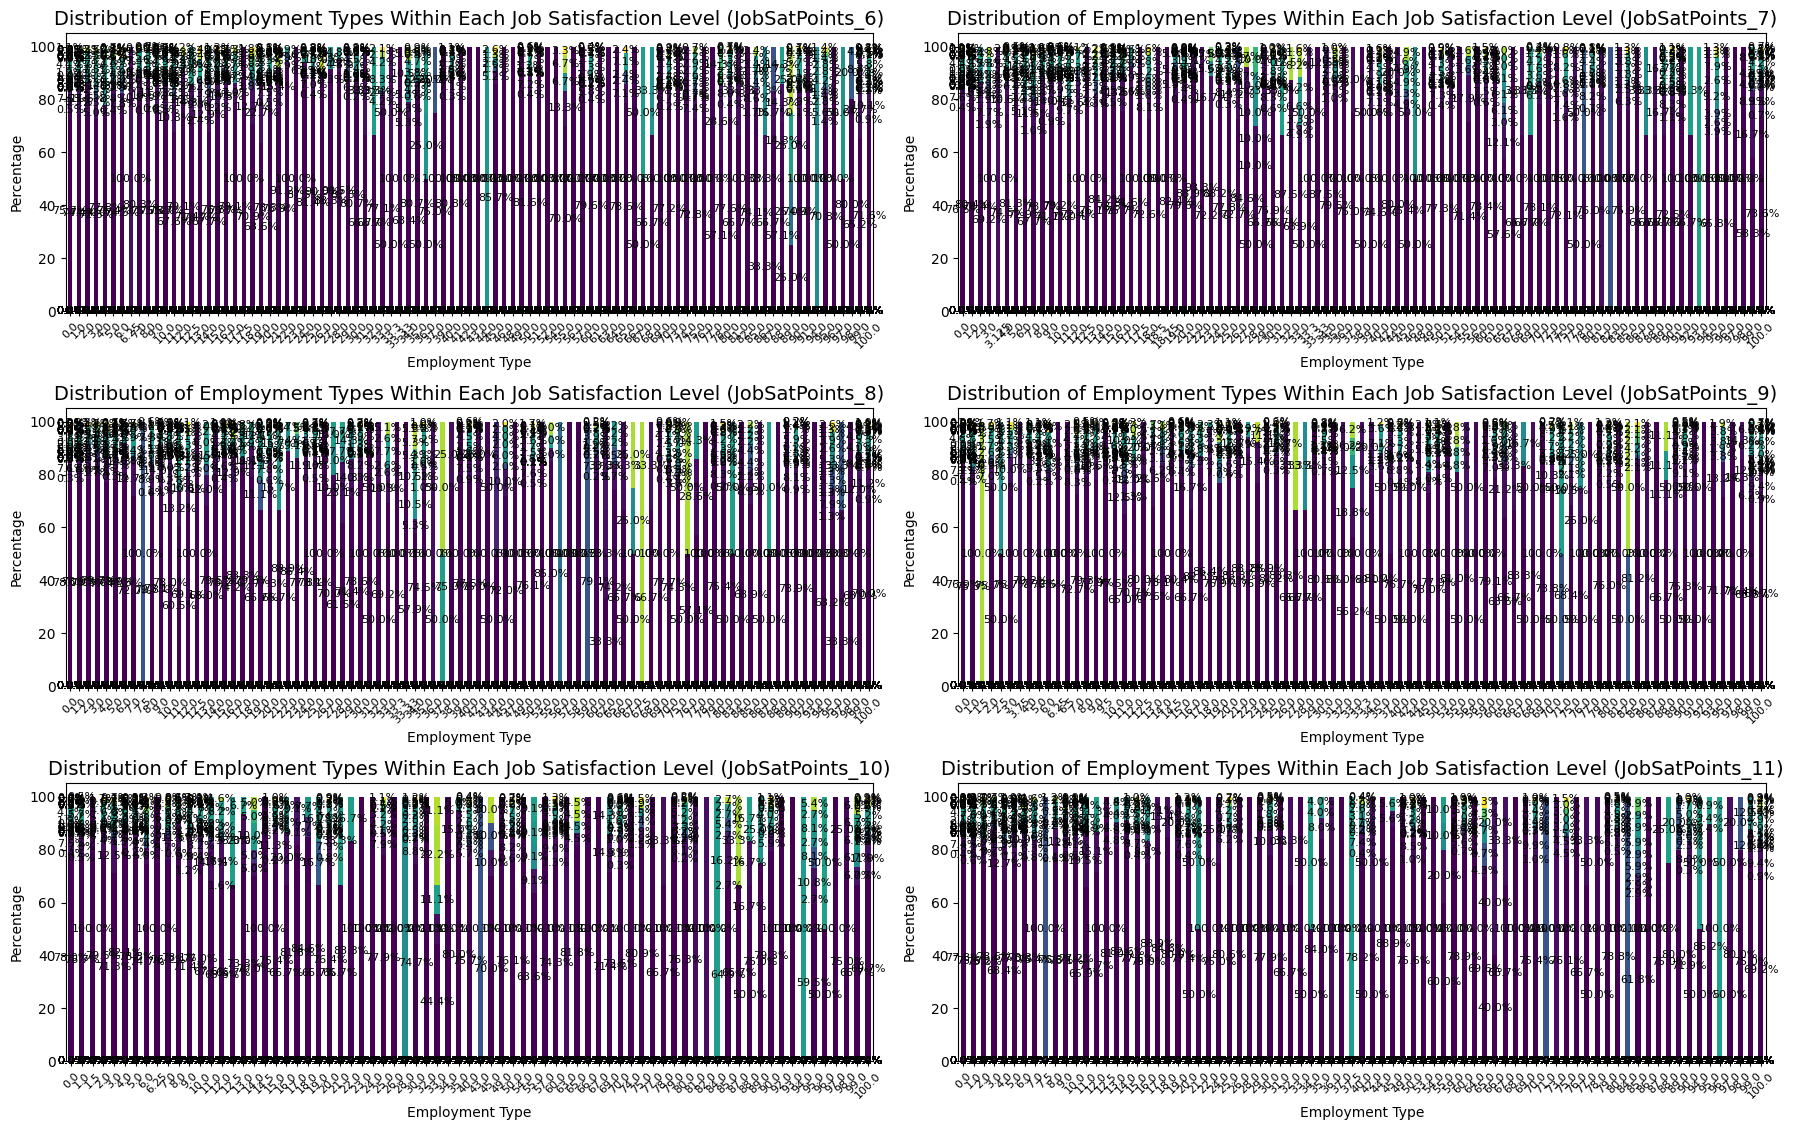

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a local file
file_name = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Ensure this path is correct
df = pd.read_csv(file_name)

# Convert the relevant columns to numeric values
job_sat_columns = ['JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']
for col in job_sat_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter out rows with missing values in the relevant columns
df_filtered = df.dropna(subset=job_sat_columns + ['Employment'])

# Create a 3x2 grid of charts
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# Plot stacked bar charts for each job satisfaction point
for i, col in enumerate(job_sat_columns):
    # Group by job satisfaction level and employment type, then count the occurrences
    employment_counts = df_filtered.groupby([col, 'Employment']).size().unstack(fill_value=0)

    # Calculate the proportion of each employment type in each job satisfaction level
    employment_proportions = employment_counts.apply(lambda x: x / x.sum(), axis=1) * 100

    # Plot the stacked bar chart
    employment_proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'Distribution of Employment Types Within Each Job Satisfaction Level ({col})', fontsize=14)
    axes[i].set_xlabel('Employment Type', fontsize=10)
    axes[i].set_ylabel('Percentage', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Adjust tick font size

    # Add percentage labels on bars
    for p in axes[i].patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        axes[i].text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

    # Remove the legend
    axes[i].legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for potentially better color palettes

# Load the dataset (with error handling)
file_name = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File not found at {file_name}")
    exit()
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    exit()

# Convert job satisfaction columns to numeric, handling errors
job_sat_columns = ['JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']
for col in job_sat_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter out rows with missing values (more efficient filtering)
df_filtered = df.dropna(subset=job_sat_columns + ['Employment'])

# Create a 3x2 grid of charts
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# Improved title for the entire figure
fig.suptitle('Distribution of Employment Types Within Each Job Satisfaction Level', fontsize=16)

# Plot stacked bar charts
for i, col in enumerate(job_sat_columns):
    employment_counts = df_filtered.groupby([col, 'Employment']).size().unstack(fill_value=0)
    employment_proportions = employment_counts.apply(lambda x: x / x.sum(), axis=1) * 100

    employment_proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')

    axes[i].set_title(f'Job Satisfaction Level: {col.replace("JobSatPoints_", "")}', fontsize=12) # More concise title
    axes[i].set_xlabel('Employment Type', fontsize=10)
    axes[i].set_ylabel('Percentage', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

    # Improved percentage labels (centered and with better formatting)
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:  # Avoid labeling 0-height bars
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2  # Center vertically
            axes[i].text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='black') # Black labels

    # Add a legend to the first subplot only
    if i == 0:
        handles, labels = axes[i].get_legend_handles_labels()  # Get handles and labels
        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(labels), fontsize=10)  # Place legend at the top

    # Remove individual subplot legends
    axes[i].legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.90])  # Adjust layout for suptitle and legend
plt.show()

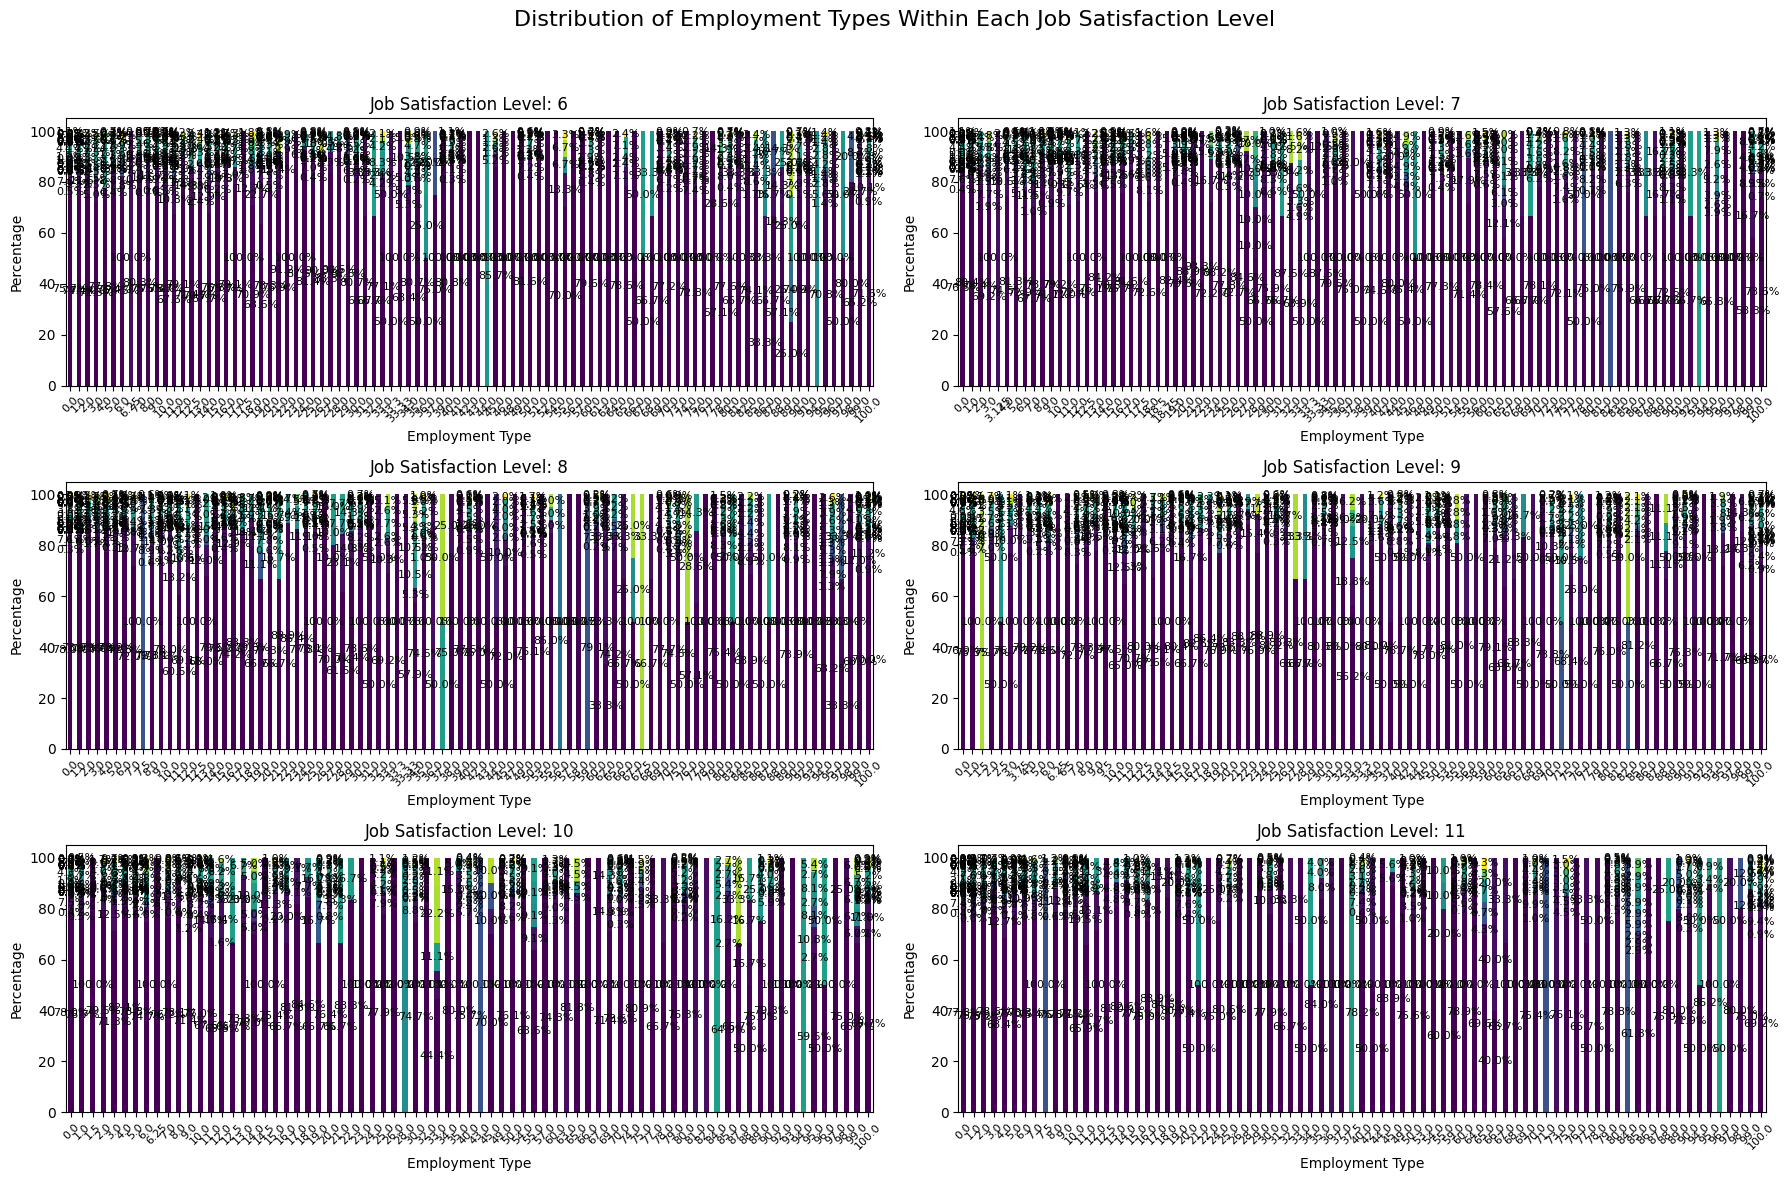

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load data and handle missing values as before) ...

# Create a 3x2 grid of charts
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# Improved title for the entire figure (only title, no subtitle)
fig.suptitle('Distribution of Employment Types Within Each Job Satisfaction Level', fontsize=16)  # Main title

# Plot stacked bar charts
for i, col in enumerate(job_sat_columns):
    employment_counts = df_filtered.groupby([col, 'Employment']).size().unstack(fill_value=0)
    employment_proportions = employment_counts.apply(lambda x: x / x.sum(), axis=1) * 100

    employment_proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')

    axes[i].set_title(f'Job Satisfaction Level: {col.replace("JobSatPoints_", "")}', fontsize=12)
    axes[i].set_xlabel('Employment Type', fontsize=10)
    axes[i].set_ylabel('Percentage', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

    # Improved percentage labels (centered and with better formatting)
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            axes[i].text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=8, color='black')

    # Remove legend from each subplot (no legend at all)
    axes[i].legend().remove()  # Remove legend


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
